In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from pandas import read_csv , set_option
from pandas.plotting import scatter_matrix

In [34]:
set_option('display.precision',2)
set_option('display.width',100)

In [35]:
df = pd.read_csv("train.csv")
df.head()

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,0,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,2,0,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,3,0,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
3,4,0,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,NaN
4,5,0,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0


# Objective:
The main goal is **to predict whether the student will be recruited in campus placements
or not based on the available factors in the dataset.** <br>

In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 215 entries, 0 to 214
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   sl_no           215 non-null    int64  
 1   gender          215 non-null    int64  
 2   ssc_p           215 non-null    float64
 3   ssc_b           215 non-null    object 
 4   hsc_p           215 non-null    float64
 5   hsc_b           215 non-null    object 
 6   hsc_s           215 non-null    object 
 7   degree_p        215 non-null    float64
 8   degree_t        215 non-null    object 
 9   workex          215 non-null    object 
 10  etest_p         215 non-null    float64
 11  specialisation  215 non-null    object 
 12  mba_p           215 non-null    float64
 13  status          215 non-null    object 
 14  salary          148 non-null    float64
dtypes: float64(6), int64(2), object(7)
memory usage: 25.3+ KB


In [37]:
df.describe()

,sl_no,gender,ssc_p,hsc_p,degree_p,etest_p,mba_p,salary
count,215.00,215.00,215.00,215.00,215.00,215.00,215.00,148.00
mean,108.00,0.35,67.30,66.33,66.37,72.10,62.28,288655.41
std,62.21,0.48,10.83,10.90,7.36,13.28,5.83,93457.45
min,1.00,0.00,40.89,37.00,50.00,50.00,51.21,200000.00
25%,54.50,0.00,60.60,60.90,61.00,60.00,57.95,240000.00
50%,108.00,0.00,67.00,65.00,66.00,71.00,62.00,265000.00
75%,161.50,1.00,75.70,73.00,72.00,83.50,66.25,300000.00
max,215.00,1.00,89.40,97.70,91.00,98.00,77.89,940000.00


In [38]:
df.columns

Index(['sl_no', 'gender', 'ssc_p', 'ssc_b', 'hsc_p', 'hsc_b', 'hsc_s', 'degree_p', 'degree_t',
       'workex', 'etest_p', 'specialisation', 'mba_p', 'status', 'salary'],
      dtype='object')

In [39]:
df = df.drop(['sl_no'],axis = 1)
df

,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,0,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,0,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,0,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
3,0,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,NaN
4,0,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
210,0,80.60,Others,82.00,Others,Commerce,77.60,Comm&Mgmt,No,91.0,Mkt&Fin,74.49,Placed,400000.0
211,0,58.00,Others,60.00,Others,Science,72.00,Sci&Tech,No,74.0,Mkt&Fin,53.62,Placed,275000.0
212,0,67.00,Others,67.00,Others,Commerce,73.00,Comm&Mgmt,Yes,59.0,Mkt&Fin,69.72,Placed,295000.0
213,1,74.00,Others,66.00,Others,Commerce,58.00,Comm&Mgmt,No,70.0,Mkt&HR,60.23,Placed,204000.0


In [40]:
df['ssc_b'].unique()

array(['Others', 'Central'], dtype=object)

In [41]:
df['hsc_b'].unique()

array(['Others', 'Central'], dtype=object)

In [42]:
df['hsc_s'].unique()

array(['Commerce', 'Science', 'Arts'], dtype=object)

In [43]:
df['degree_t'].unique()

array(['Sci&Tech', 'Comm&Mgmt', 'Others'], dtype=object)

In [44]:
#"secondary_percent" , "secondary_branch" , "highschool_percent" , "high_school_branch" , "degree_percent" , "degree_type" , "work_xp"
change_columns = {'ssc_p' : "secondary_percent" ,'ssc_b' : "secondary_branch" ,
           'hsc_p' : "highschool_percent" ,'hsc_b' : "high_school_branch" ,
           'degree_p' : "degree_percent" ,'degree_t' : "degree_type" ,
          'mba_p' : 'mba_percent' ,'workex' : 'work_xp',
                 'etest_p' : "employment_test_percent"}

In [45]:
df.rename(columns = change_columns , inplace = True)

In [46]:
df

,gender,secondary_percent,secondary_branch,highschool_percent,high_school_branch,hsc_s,degree_percent,degree_type,work_xp,employment_test_percent,specialisation,mba_percent,status,salary
0,0,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,0,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,0,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
3,0,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,NaN
4,0,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
210,0,80.60,Others,82.00,Others,Commerce,77.60,Comm&Mgmt,No,91.0,Mkt&Fin,74.49,Placed,400000.0
211,0,58.00,Others,60.00,Others,Science,72.00,Sci&Tech,No,74.0,Mkt&Fin,53.62,Placed,275000.0
212,0,67.00,Others,67.00,Others,Commerce,73.00,Comm&Mgmt,Yes,59.0,Mkt&Fin,69.72,Placed,295000.0
213,1,74.00,Others,66.00,Others,Commerce,58.00,Comm&Mgmt,No,70.0,Mkt&HR,60.23,Placed,204000.0


In [47]:
df.isnull().sum()

gender                      0
secondary_percent           0
secondary_branch            0
highschool_percent          0
high_school_branch          0
hsc_s                       0
degree_percent              0
degree_type                 0
work_xp                     0
employment_test_percent     0
specialisation              0
mba_percent                 0
status                      0
salary                     67
dtype: int64

<Axes: ylabel='salary'>

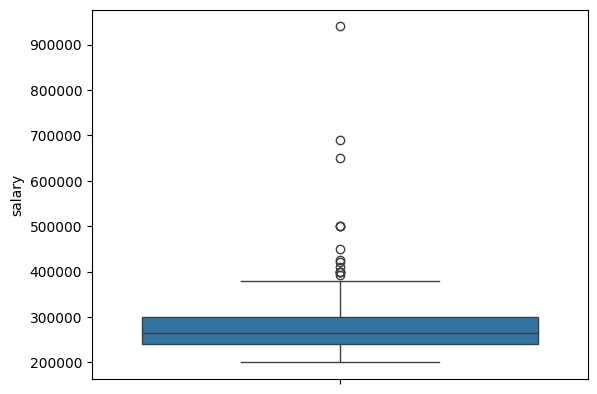

In [17]:
sns.boxplot(df['salary'])

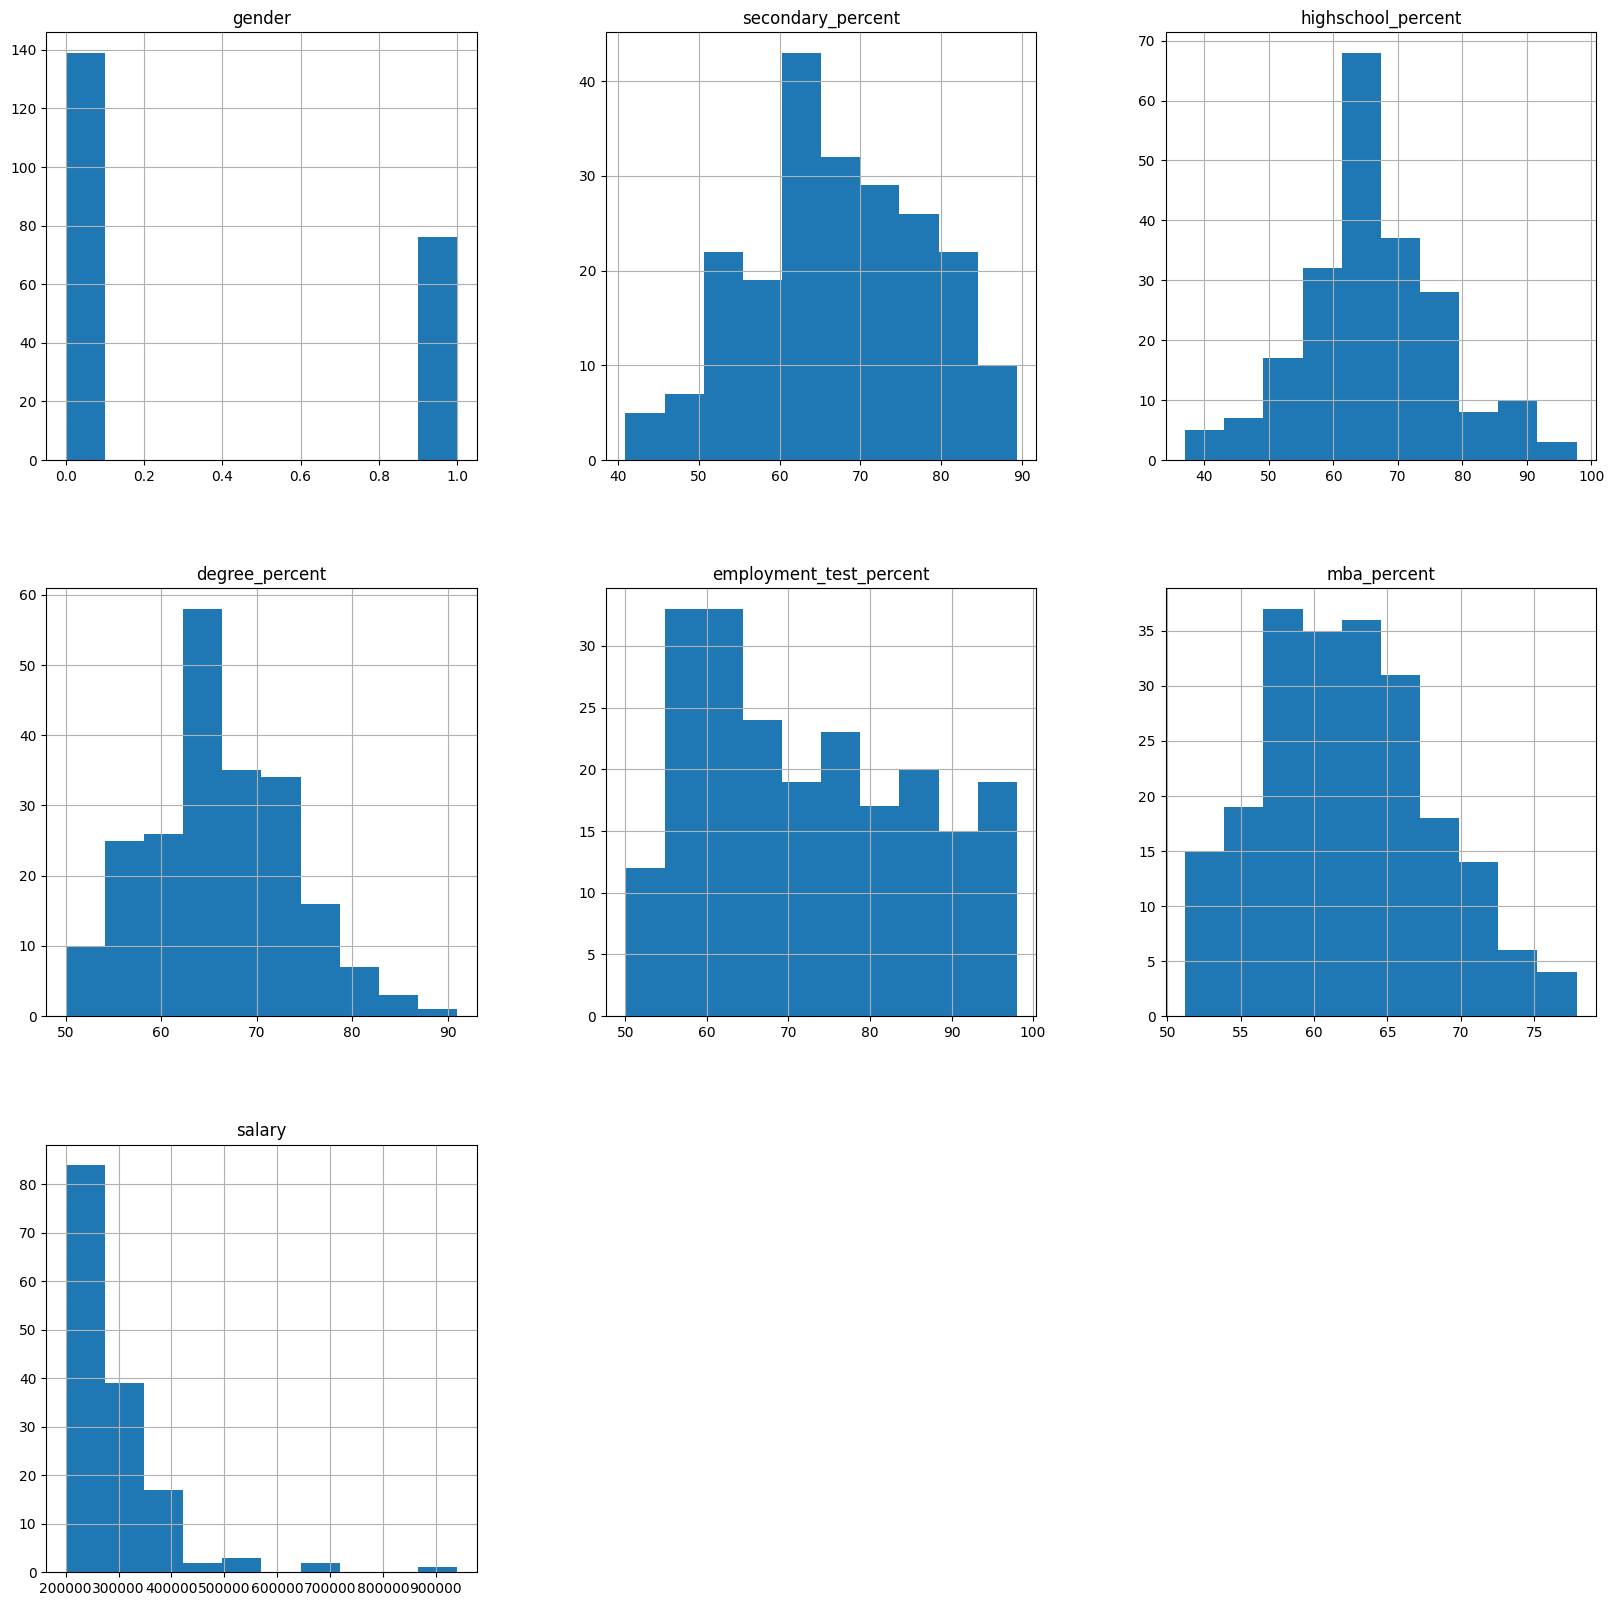

In [18]:
df.hist(figsize = (20,20))
plt.show()

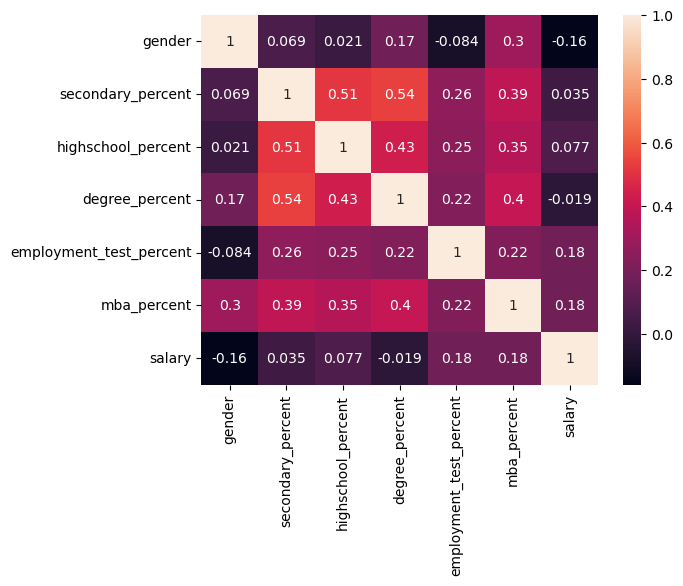

In [18]:
sns.heatmap(df.corr(), annot = True)
plt.show()

In [48]:
df = df.drop(['salary' , 'gender'] , axis = 1)
df.head()

,secondary_percent,secondary_branch,highschool_percent,high_school_branch,hsc_s,degree_percent,degree_type,work_xp,employment_test_percent,specialisation,mba_percent,status
0,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed
1,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed
2,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed
3,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed
4,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed


<AxesSubplot:>

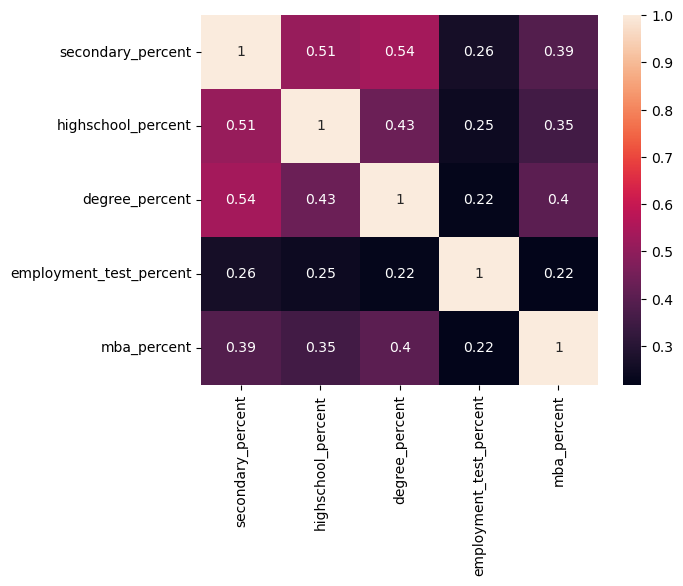

In [20]:
sns.heatmap(df.corr() ,annot = True)


In [49]:
df.columns

Index(['secondary_percent', 'secondary_branch', 'highschool_percent', 'high_school_branch',
       'hsc_s', 'degree_percent', 'degree_type', 'work_xp', 'employment_test_percent',
       'specialisation', 'mba_percent', 'status'],
      dtype='object')

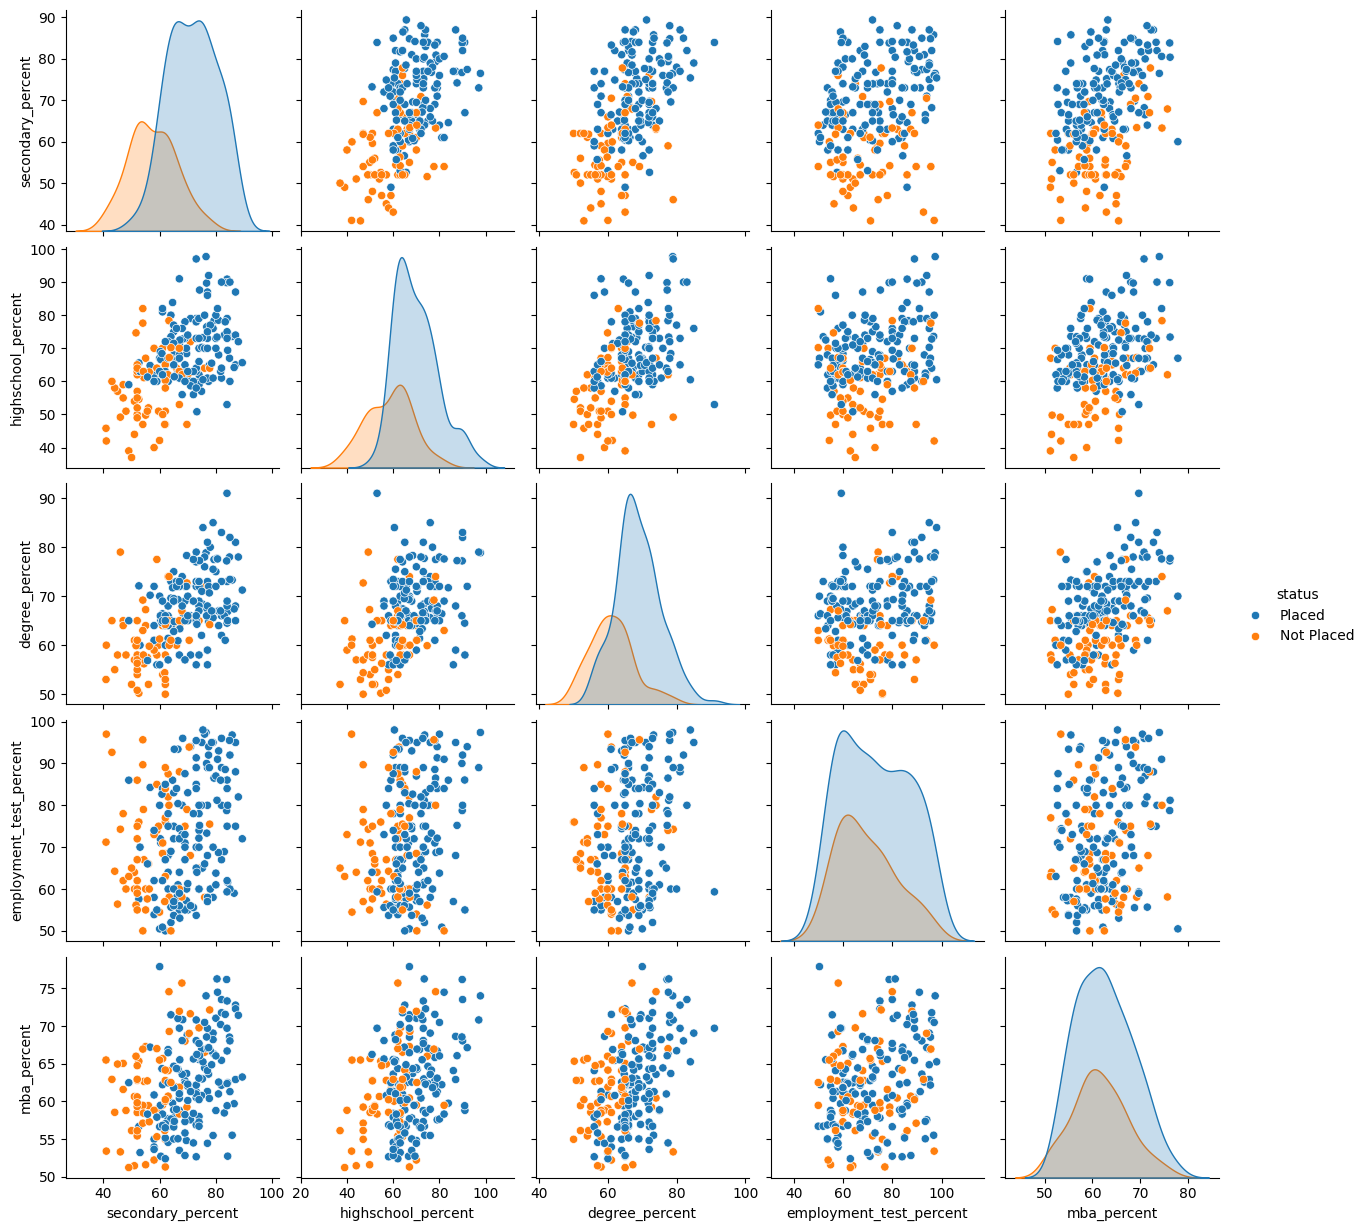

In [21]:
sns.pairplot(df , hue = "status")
plt.show()

In [50]:
X = df.drop(['status'] , axis = 1)
Y = df.status

X.head(10)

,secondary_percent,secondary_branch,highschool_percent,high_school_branch,hsc_s,degree_percent,degree_type,work_xp,employment_test_percent,specialisation,mba_percent
0,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.00,Mkt&HR,58.80
1,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.50,Mkt&Fin,66.28
2,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.00,Mkt&Fin,57.80
3,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.00,Mkt&HR,59.43
4,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.80,Mkt&Fin,55.50
5,55.00,Others,49.80,Others,Science,67.25,Sci&Tech,Yes,55.00,Mkt&Fin,51.58
6,46.00,Others,49.20,Others,Commerce,79.00,Comm&Mgmt,No,74.28,Mkt&Fin,53.29
7,82.00,Central,64.00,Central,Science,66.00,Sci&Tech,Yes,67.00,Mkt&Fin,62.14
8,73.00,Central,79.00,Central,Commerce,72.00,Comm&Mgmt,No,91.34,Mkt&Fin,61.29
9,58.00,Central,70.00,Central,Commerce,61.00,Comm&Mgmt,No,54.00,Mkt&Fin,52.21


In [51]:
Y.head(10)

0        Placed
1        Placed
2        Placed
3    Not Placed
4        Placed
5    Not Placed
6    Not Placed
7        Placed
8        Placed
9    Not Placed
Name: status, dtype: object

In [52]:
df['specialisation'] = df['specialisation'].map({'Mkt&HR': 1, 'Mkt&Fin': 0}) 

In [53]:
df['degree_type'] = df['degree_type'].map({'Sci&Tech': 1, 'Comm&Mgmt': 2,'Others':0}) 

In [54]:
df['hsc_s'] = df['hsc_s'].map({'Science': 1, 'Commerce': 2,'Arts':3}) 

In [55]:
df['high_school_branch'] = df['high_school_branch'].map({'Central': 1, 'Others': 0}) 

In [56]:
df['secondary_branch'] = df['secondary_branch'].map({'Central': 1, 'Others': 0}) 

In [57]:
df['status'] = df['status'].map({'Placed': 1, 'Not Placed': 0}) 

In [58]:
df['work_xp'] = df['work_xp'].map({'Yes': 1, 'No': 0}) 

In [59]:
df

,secondary_percent,secondary_branch,highschool_percent,high_school_branch,hsc_s,degree_percent,degree_type,work_xp,employment_test_percent,specialisation,mba_percent,status
0,67.00,0,91.00,0,2,58.00,1,0,55.0,1,58.80,1
1,79.33,1,78.33,0,1,77.48,1,1,86.5,0,66.28,1
2,65.00,1,68.00,1,3,64.00,2,0,75.0,0,57.80,1
3,56.00,1,52.00,1,1,52.00,1,0,66.0,1,59.43,0
4,85.80,1,73.60,1,2,73.30,2,0,96.8,0,55.50,1
...,...,...,...,...,...,...,...,...,...,...,...,...
210,80.60,0,82.00,0,2,77.60,2,0,91.0,0,74.49,1
211,58.00,0,60.00,0,1,72.00,1,0,74.0,0,53.62,1
212,67.00,0,67.00,0,2,73.00,2,1,59.0,0,69.72,1
213,74.00,0,66.00,0,2,58.00,2,0,70.0,1,60.23,1


Model training and testing
  --using different models to train the data and comparing their accuracy.

In [60]:
from sklearn.model_selection import train_test_split

In [62]:
y=df.status
x=df.drop(['status'],axis=1)


In [66]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.2 , random_state = 3)

In [64]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

In [67]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
lr.fit(xtrain,ytrain)

/home/codespace/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [68]:
y_pred=lr.predict(xtest)
accuracy_score(ytest,y_pred)*100

88.37209302325581

In [70]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda= LinearDiscriminantAnalysis()
lda.fit(xtrain,ytrain)

LinearDiscriminantAnalysis()

In [71]:
y_lda=ida.predict(xtest)
accuracy_score(ytest,y_lda)*100

93.02325581395348

In [72]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()
rfc.fit(xtrain,ytrain)

RandomForestClassifier()

In [73]:
y_rfc=rfc.predict(xtest)
accuracy_score(ytest,y_rfc)*100

88.37209302325581

In [74]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(xtrain, ytrain)

KNeighborsClassifier()

In [75]:
y_knn=knn.predict(xtest)
accuracy_score(ytest,y_knn)*100

86.04651162790698

In [76]:
from sklearn.svm import SVC
svs=SVC()
svs.fit(xtrain,ytrain)

SVC()

In [77]:
y_svc=svs.predict(xtest)
accuracy_score(ytest,y_svc)*100

83.72093023255815

In [78]:
from sklearn.naive_bayes import GaussianNB
gnb=GaussianNB()
gnb.fit(xtrain,ytrain)

GaussianNB()

In [79]:
gnb_pred=gnb.predict(xtest)
accuracy_score(ytest,gnb_pred)*100

88.37209302325581

Here 'LinearDiscriminantAnalysis' model, has the highest accuracy.